# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

arq = pd.read_csv('base_processada.csv')
arq

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [20]:
arq = arq.drop_duplicates()

arq = arq.fillna(arq.median())

arq = pd.get_dummies(arq, drop_first= True)

print(arq.head())

   qtd_filhos      idade  tempo_emprego  possui_celular  \
0           0  58.832877       3.106849               1   
1           0  52.356164       8.358904               1   
3           0  46.224658       2.106849               1   
4           0  29.230137       3.021918               1   
6           0  27.482192       4.024658               1   

   possui_fone_comercial  possui_fone  possui_email  qt_pessoas_residencia  \
0                      0            0             0                    2.0   
1                      0            1             1                    1.0   
3                      1            1             1                    2.0   
4                      0            0             0                    2.0   
6                      0            1             0                    2.0   

     mau  sexo_M  ...  educacao_Secondary / secondary special  \
0  False    True  ...                                    True   
1  False   False  ...                         

In [47]:
X = arq.drop('mau', axis=1)

y = arq['possui_email']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11655, 28) (4995, 28) (11655,) (4995,)


In [48]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

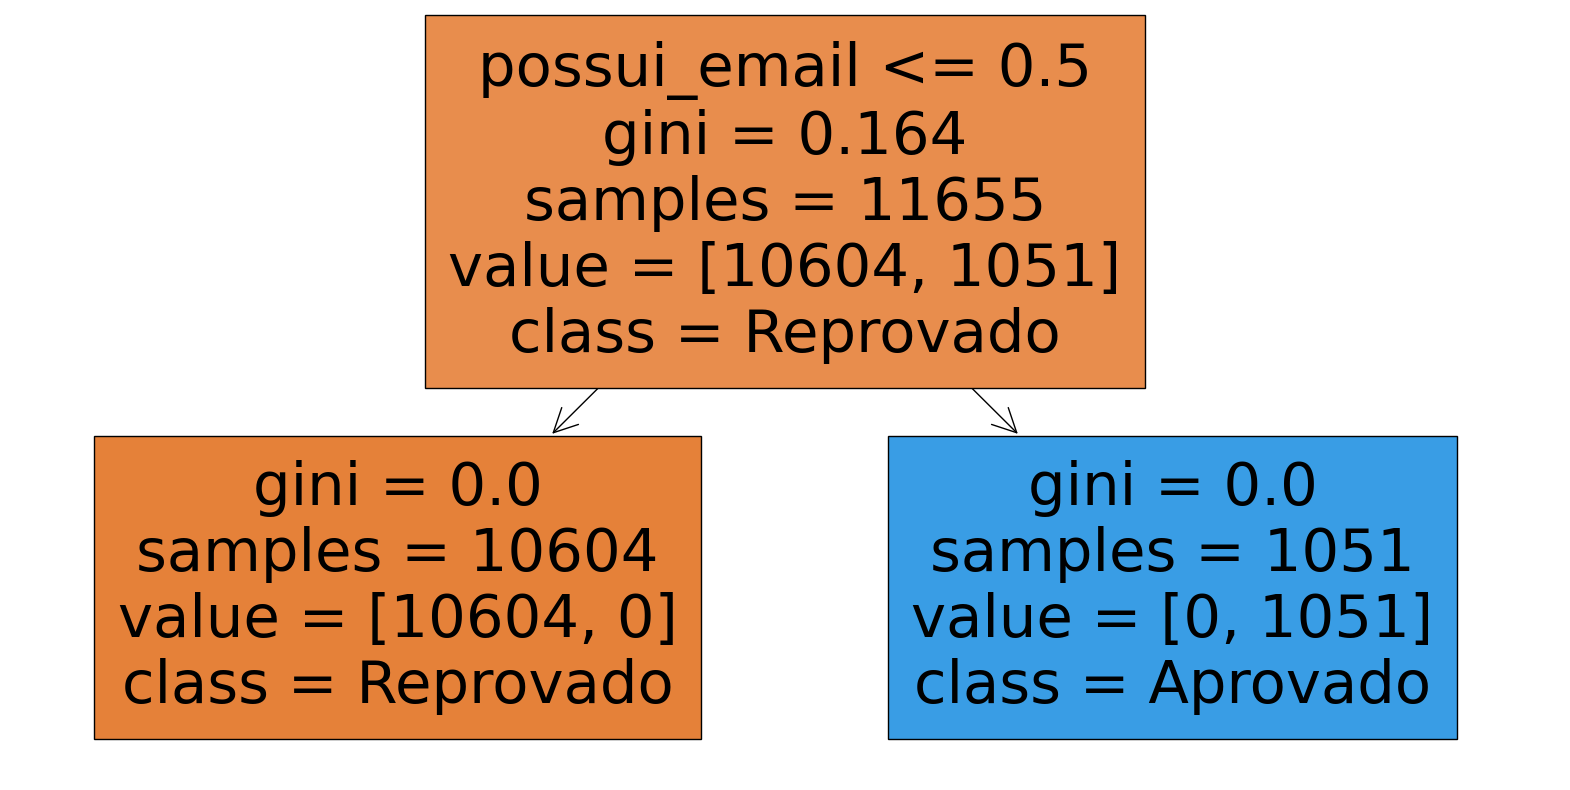

In [49]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Reprovado', 'Aprovado'], filled=True)
plt.show()

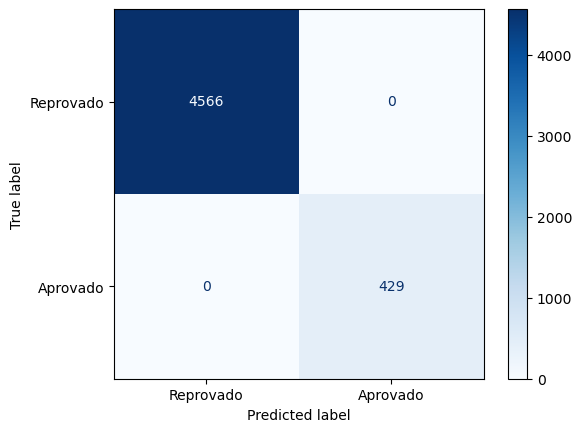

In [50]:
y_pred = clf.predict(X_test)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reprovado', 'Aprovado'])

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [51]:
#Calculo  da acurácia
y_train_pred = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {accuracy_train:.2f}')

Acurácia na base de treinamento: 1.00


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

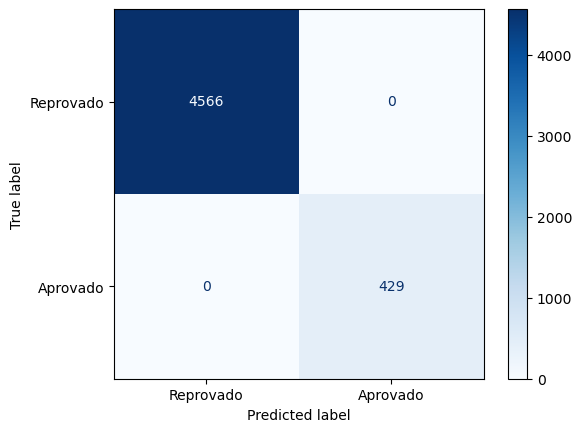

Acurácia na base de teste: 1.00


In [52]:
y_test_pred = clf.predict(X_test)


cm_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Reprovado', 'Aprovado'])

#visualizacao da matriz
disp_test.plot(cmap=plt.cm.Blues)
plt.show()

#calculo
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia na base de teste: {accuracy_test:.2f}')

In [53]:
print(f'Acurácia na base de treinamento: {accuracy_train:.2f}')
print(f'Acurácia na base de teste: {accuracy_test:.2f}')

Acurácia na base de treinamento: 1.00
Acurácia na base de teste: 1.00


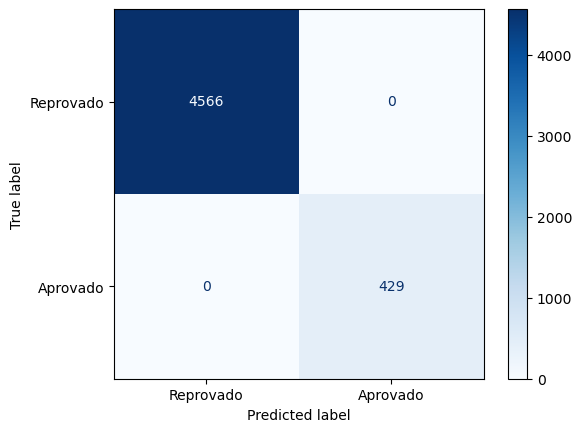

Acurácia na base de teste com o novo modelo: 1.00


In [54]:
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_new.fit(X_train, y_train)


y_test_pred_new = clf_new.predict(X_test)

cm_test_new = confusion_matrix(y_test, y_test_pred_new, labels=[0, 1])
disp_test_new = ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=['Reprovado', 'Aprovado'])


disp_test_new.plot(cmap=plt.cm.Blues)
plt.show()

# Calcular a acurácia da base de teste com o novo modelo
accuracy_test_new = accuracy_score(y_test, y_test_pred_new)
print(f'Acurácia na base de teste com o novo modelo: {accuracy_test_new:.2f}')

In [55]:
#'maus'
proporcao_maus = (y_test_pred_new == 0).sum() / len(y_test_pred_new)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.2f}')

Proporção de proponentes classificados como "maus": 0.91


In [56]:
#'bons'
y_all_bons = np.ones_like(y_test)

accuracy_all_bons = accuracy_score(y_test, y_all_bons)
print(f'Acurácia se todos os contratos fossem classificados como "bons": {accuracy_all_bons:.2f}')

Acurácia se todos os contratos fossem classificados como "bons": 0.09
